In [1]:
import os, sys
sys.path.append(os.path.abspath('..'))

import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from main import *

# We get the splitted data directly from keras datasets
# So, no need to use train_test_split()
X_train, X_test, y_train, y_test = load_data()
summary_statistics(X_train)

X_train, X_test = preprocess_for_sklearn(X_train, X_test)

=== Summary Statistics ===
Mean pixel value: 72.94
Std deviation: 90.02
Min pixel value: 0
Max pixel value: 255


In [ ]:
# Use this for faster training
# X_train = X_train[:20000]
# y_train = y_train[:20000]

model = LogisticRegression(max_iter=1000, n_jobs=-1)
model, train_time = train_with_timing(model, X_train, y_train)
print(f"Training Time: {train_time:.2f} seconds")

joblib.dump(model, "../models/logistic_regression_model.joblib")

size = get_model_size("../models/logistic_regression_model.joblib")
print(f"Model Size: {size:.2f} KB")

Training Time: 174.66 seconds
Model Size: 62.18 KB


Accuracy: 84.40%
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.80      0.80      1000
     Trouser       0.97      0.96      0.96      1000
    Pullover       0.73      0.74      0.73      1000
       Dress       0.83      0.86      0.84      1000
        Coat       0.74      0.77      0.75      1000
      Sandal       0.94      0.92      0.93      1000
       Shirt       0.62      0.57      0.60      1000
     Sneaker       0.91      0.94      0.92      1000
         Bag       0.93      0.94      0.93      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix:


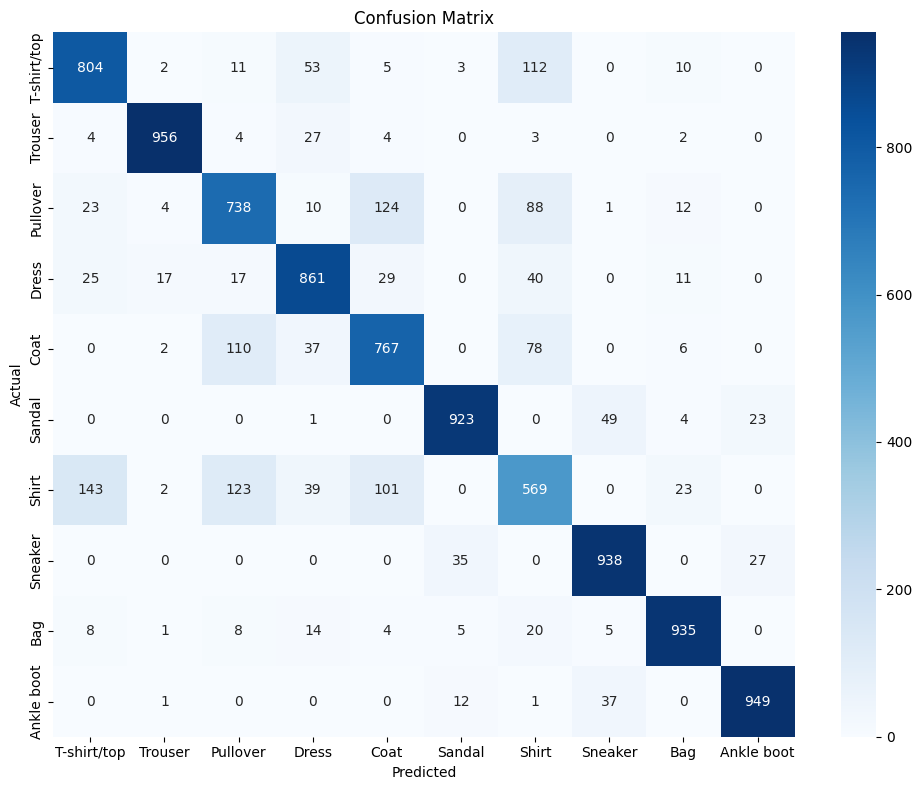

In [ ]:
# To load the saved model
# model = joblib.load("../models/logistic_regression_model.joblib")

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=CLASS_NAMES))

print("Confusion Matrix:")
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues",
           xticklabels=CLASS_NAMES,
           yticklabels=CLASS_NAMES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Logistic Regression achieved 84.40% accuracy, which is reasonable since it is a purely linear model. Clothing silhouettes and textures require non-linear feature extraction, which Logistic Regression cannot capture. This serves as a good baseline model.